<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Surface" data-toc-modified-id="Surface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Surface</a></span><ul class="toc-item"><li><span><a href="#CSPA" data-toc-modified-id="CSPA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>CSPA</a></span></li><li><span><a href="#In-silico-surfaceome" data-toc-modified-id="In-silico-surfaceome-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>In silico surfaceome</a></span></li><li><span><a href="#CellPhoneDB" data-toc-modified-id="CellPhoneDB-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>CellPhoneDB</a></span></li><li><span><a href="#Human-Protein-Atlas" data-toc-modified-id="Human-Protein-Atlas-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Human Protein Atlas</a></span></li><li><span><a href="#Integration" data-toc-modified-id="Integration-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Integration</a></span></li></ul></li><li><span><a href="#Druggable" data-toc-modified-id="Druggable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Druggable</a></span></li><li><span><a href="#Intersection-Surface---Druggable" data-toc-modified-id="Intersection-Surface---Druggable-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Intersection Surface - Druggable</a></span></li><li><span><a href="#GTEX-and-FANTOM-bulk-expression-analyses" data-toc-modified-id="GTEX-and-FANTOM-bulk-expression-analyses-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GTEX and FANTOM bulk expression analyses</a></span><ul class="toc-item"><li><span><a href="#Human-GTEX" data-toc-modified-id="Human-GTEX-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Human GTEX</a></span></li><li><span><a href="#Merge-categories-in-human-TPM" data-toc-modified-id="Merge-categories-in-human-TPM-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Merge categories in human TPM</a></span></li><li><span><a href="#Mouse-Merkin" data-toc-modified-id="Mouse-Merkin-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mouse Merkin</a></span></li></ul></li></ul></div>

This notebook reproduces the processing of multiple databases to infer genes coding for surface- and druggable proteins and well as bulk sequencing analysis.

First, we import the required packages

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb


from gprofiler import gprofiler

import warnings
from rpy2.rinterface import RRuntimeWarning
from rpy2.robjects import pandas2ri

%load_ext rpy2.ipython

warnings.filterwarnings("ignore", category=RRuntimeWarning)
pandas2ri.activate()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sc.settings.verbosity = 3
sc.logging.print_versions()

/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/python/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


scanpy==1.4.6 anndata==0.7.1 umap==0.4.0 numpy==1.18.2 scipy==1.4.1 pandas==1.3.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [2]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [3]:
sc.set_figure_params(vector_friendly=True, color_map='Reds',
                     dpi=200,transparent=True, fontsize=14)

In [4]:
palette=['#FFFF00','#1CE6FF','#FF34FF','#FF4A46','#008941','#006FA6','#A30059','#FFDBE5', '#0000A6',
          '#63FFAC','#B79762', '#8FB0FF','#997D87','#5A0007','#809693','#FEFFE6','#1B4400','#4FC601',
          '#3B5DFF','#4A3B53','#FF2F80','#61615A','#BA0900','#6B7900','#00C2A0','#FF90C9','#B903AA',
          '#D16100','#DDEFFF','#000035','#7B4F4B','#A1C299','#300018','#0AA6D8','#013349','#00846F',
          '#372101','#FFB500','#C2FFED','#A079BF','#CC0744','#C0B9B2','#C2FF99','#001E09','#00489C',
          '#6F0062','#0CBD66','#EEC3FF','#456D75','#B77B68','#7A87A1']

In [ ]:
# set path for data and results
writepath='path/to/data/'

In [6]:
import omnipath as op

# Surface

## CSPA

In [7]:
# import database
CSPA = op.requests.Annotations.get(resources = 'CSPA')

  0%|          | 0.00/501k [00:00<?, ?B/s]

In [9]:
# single protein coding
CSPA = CSPA[CSPA['entity_type']=='protein']

In [10]:
CSPA.label.value_counts()

gpi                     1476
high_confidence         1476
n_cell_types            1476
tm                      1476
uniprot_cell_surface    1476
Name: label, dtype: int64

In [11]:
# cell surface location
CSPA = CSPA[CSPA['label']=='uniprot_cell_surface']

In [13]:
CSPA = CSPA[CSPA['value']=='True']

In [14]:
CSPA

,uniprot,genesymbol,entity_type,source,label,value,record_id
4,P08473,MME,protein,CSPA,uniprot_cell_surface,True,0
9,Q92854,SEMA4D,protein,CSPA,uniprot_cell_surface,True,1
14,Q93033,CD101,protein,CSPA,uniprot_cell_surface,True,2
19,P13598,ICAM2,protein,CSPA,uniprot_cell_surface,True,3
24,P38570,ITGAE,protein,CSPA,uniprot_cell_surface,True,4
...,...,...,...,...,...,...,...
5189,Q75V66,ANO5,protein,CSPA,uniprot_cell_surface,True,1037
5194,O00391,QSOX1,protein,CSPA,uniprot_cell_surface,True,1038
5199,Q969V3,NCLN,protein,CSPA,uniprot_cell_surface,True,1039
5204,Q8TDJ6,DMXL2,protein,CSPA,uniprot_cell_surface,True,1040


In [15]:
# get genes
CSPA_genes=np.array(CSPA['genesymbol'])

In [16]:
CSPA_genes=np.unique(CSPA_genes)

In [17]:
len(CSPA_genes)

996

In [18]:
CSPA_genes=pd.DataFrame(CSPA_genes)
CSPA_genes.columns = ['CSPA_genes']

In [19]:
CSPA_genes

,CSPA_genes
0,A2M
1,ABCA7
2,ABCA8
3,ABCB1
4,ABCC1
...,...
991,WNT5A
992,WNT5B
993,YBX1
994,ZDHHC5


In [21]:
# save results
CSPA_genes.to_csv(writepath + 'CSPA_genes.csv')

## In silico surfaceome

In [22]:
# import database
surfaceome = op.requests.Annotations.get(resources = 'Surfaceome')

  0%|          | 0.00/527k [00:00<?, ?B/s]

In [24]:
# single protein coding
surfaceome = surfaceome[surfaceome['entity_type']=='protein']

In [25]:
surfaceome

,uniprot,genesymbol,entity_type,source,label,value,record_id
0,A0AV02,SLC12A8,protein,Surfaceome,score,0.8363,0
1,A0AV02,SLC12A8,protein,Surfaceome,mainclass,Transporters,0
2,A0AV02,SLC12A8,protein,Surfaceome,subclasses,APC;SLC;SLC12,0
3,A0FGR9,ESYT3,protein,Surfaceome,score,0.0465,1
4,A0FGR9,ESYT3,protein,Surfaceome,mainclass,Unclassified,1
...,...,...,...,...,...,...,...
8187,Q9Y6W8,ICOS,protein,Surfaceome,mainclass,Unclassified,2806
8188,Q9Y6W8,ICOS,protein,Surfaceome,subclasses,Unclassified,2806
8189,Q9Y6X5,ENPP4,protein,Surfaceome,score,0.7829,2807
8190,Q9Y6X5,ENPP4,protein,Surfaceome,mainclass,Enzymes,2807


In [26]:
surfaceome.label.value_counts()

score         2808
mainclass     2692
subclasses    2692
Name: label, dtype: int64

In [27]:
# get genes
surfaceome_genes=np.array(surfaceome['genesymbol'].astype(str))

In [28]:
surfaceome_genes=np.unique(surfaceome_genes)

In [29]:
len(surfaceome_genes)

2804

In [30]:
surfaceome_genes=pd.DataFrame(surfaceome_genes)
surfaceome_genes.columns = ['surfaceome_genes']

In [31]:
surfaceome_genes

,surfaceome_genes
0,ABCA1
1,ABCA12
2,ABCA13
3,ABCA2
4,ABCA3
...,...
2799,ZP1
2800,ZP2
2801,ZP3
2802,ZP4


In [33]:
# save results
surfaceome_genes.to_csv(writepath + 'In_silico_surfaceome_genes.csv')

## CellPhoneDB

In [34]:
# import database
CellPhoneDB = op.requests.Annotations.get(resources = 'CellPhoneDB')

  0%|          | 0.00/546k [00:00<?, ?B/s]

In [36]:
# single protein coding
CellPhoneDB = CellPhoneDB[CellPhoneDB['entity_type']=='protein']

In [37]:
CellPhoneDB

,uniprot,genesymbol,entity_type,source,label,value,record_id
0,A4D1S0,KLRG2,protein,CellPhoneDB,receptor,True,0
1,A4D1S0,KLRG2,protein,CellPhoneDB,receptor_class,klr,0
2,A4D1S0,KLRG2,protein,CellPhoneDB,peripheral,False,0
3,A4D1S0,KLRG2,protein,CellPhoneDB,secreted,False,0
4,A4D1S0,KLRG2,protein,CellPhoneDB,secreted_class,None,0
...,...,...,...,...,...,...,...
6841,Q9Y6W8,ICOS,protein,CellPhoneDB,peripheral,False,977
6842,Q9Y6W8,ICOS,protein,CellPhoneDB,secreted,True,977
6843,Q9Y6W8,ICOS,protein,CellPhoneDB,secreted_class,secreted,977
6844,Q9Y6W8,ICOS,protein,CellPhoneDB,transmembrane,True,977


In [38]:
CellPhoneDB.label.value_counts()

integrin          978
peripheral        978
receptor          978
receptor_class    978
secreted          978
secreted_class    978
transmembrane     978
Name: label, dtype: int64

In [39]:
# get genes
CellPhoneDB_genes=np.array(CellPhoneDB['genesymbol'])

In [40]:
CellPhoneDB_genes=np.unique(CellPhoneDB_genes)

In [41]:
len(CellPhoneDB_genes)

977

In [42]:
CellPhoneDB_genes=pd.DataFrame(CellPhoneDB_genes)
CellPhoneDB_genes.columns = ['CellPhoneDB_genes']

In [43]:
CellPhoneDB_genes

,CellPhoneDB_genes
0,ACE2
1,ACKR1
2,ACKR2
3,ACKR3
4,ACKR4
...,...
972,XCL1
973,XCL2
974,XCR1
975,XPR1


In [45]:
# save results
CellPhoneDB_genes.to_csv(writepath + 'CellPhoneDB_genes.csv')

## Human Protein Atlas

In [46]:
# HPA data was downloaded from https://www.proteinatlas.org/humanproteome/cell/plasma+membrane

In [47]:
# import data
HPA_surface=pd.read_csv(writepath + 'subcell_location_Plasma.tsv', delimiter='\t')

/opt/python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (47,51,54,57,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [48]:
# get genes
HPA_surface_genes=np.array(HPA_surface['Gene'])

In [49]:
len(HPA_surface_genes)

2087

In [50]:
HPA_surface_genes=pd.DataFrame(HPA_surface_genes)
HPA_surface_genes.columns = ['HPA_surface_genes']

In [51]:
HPA_surface_genes

,HPA_surface_genes
0,AADAT
1,AAK1
2,ABCA12
3,ABCA7
4,ABCB1
...,...
2082,ZSCAN22
2083,ZSCAN29
2084,ZSWIM1
2085,ZSWIM8


In [53]:
# save results
HPA_surface_genes.to_csv(writepath + 'HPA_surface_genes.csv')

## Integration

In [57]:
CSPA_genes=pd.read_csv(writepath + 'CSPA_genes.csv')
CSPA_genes=np.array(CSPA_genes['CSPA_genes'])

CellPhoneDB_genes=pd.read_csv(writepath + 'CellPhoneDB_genes.csv')
CellPhoneDB_genes=np.array(CellPhoneDB_genes['CellPhoneDB_genes'])

surfaceome_genes=pd.read_csv(writepath + 'In_silico_surfaceome_genes.csv')
surfaceome_genes=np.array(surfaceome_genes['surfaceome_genes'])

HPA_surface_genes=pd.read_csv(writepath + 'HPA_surface_genes.csv')
HPA_surface_genes=np.array(HPA_surface_genes['HPA_surface_genes'])

In [58]:
merged_all4=np.append(CellPhoneDB_genes, CSPA_genes)
merged_all4=np.append(merged_all4, surfaceome_genes)
merged_all4=np.append(merged_all4, HPA_surface_genes)

len(merged_all4)

merged_all4=np.unique(merged_all4)
len(merged_all4)

4932

In [61]:
# save results
merged_all4.to_csv(writepath + 'CellPhoneDB_CSPA_Surfaceome_HPA.csv')

# Druggable

In [62]:
# DrugBank list obtained
#https://www.proteinatlas.org/humanproteome/tissue/druggable#potential)
# https://www.proteinatlas.org/search/protein_class%3AFDA+approved+drug+targets

In [63]:
# import data
druggable_proteome=pd.read_csv(writepath + 'protein_class_FDA.tsv', delimiter='\t')

In [64]:
# get genes
druggable_proteome_genes=np.array(druggable_proteome['Gene'])
druggable_proteome_genes=np.unique(druggable_proteome_genes)
len(druggable_proteome_genes)

754

In [66]:
druggable_proteome_genes=pd.DataFrame(druggable_proteome_genes)
druggable_proteome_genes.columns = ['druggable_proteome_genes']

In [ ]:
# save results
druggable_proteome_genes.to_csv(writepath + 'druggable_proteome_genes.csv')

# Intersection Surface - Druggable

In [67]:
from functools import reduce

In [68]:
intersect=reduce(np.intersect1d, (merged_all4, druggable_proteome_genes))
len(intersect)

414

# GTEX and FANTOM bulk expression analyses

## Human GTEX

In [69]:
import anndata

In [70]:
# GTEX TPM data for CD86 and CSF1R was obtained using the Expression Atlas (https://www.ebi.ac.uk/gxa/home)

In [76]:
df_tpm=pd.read_csv(writepath + 'human_GTEX_TPM.csv', delimiter=';')
df_tpm.index=df_tpm['Gene Name']
df_tpm = df_tpm.iloc[: , 2:]
df_tpm

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0


In [77]:
# normalize
column_maxes = df_tpm.max()
df_max = column_maxes.max()
normalized_df_tpm = df_tpm / df_max

In [78]:
normalized_df_tpm

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.002692,0.003077,0.030769,0.226923,0.011538,0.003846,0.023077,0.003846,0.046154,0.011538,0.003846,NaN,NaN,0.001923,0.023077,0.003077,0.003846,0.011538,0.007692,0.003846,0.007692,0.007692,0.023077,NaN,0.007692,0.007692,0.002692,0.003846,0.046154,0.007692,0.003846,0.003846,0.001923,0.003846,0.007692,0.003077,0.007692,NaN,0.019231,0.073077,0.003846,0.019231,0.011538,0.007692,0.007692,0.003846,0.011538,0.019231,NaN,0.011538,0.007692,0.007692,0.003846
CSF1R,0.026923,0.026923,0.134615,0.003462,0.096154,0.038462,0.119231,0.023077,0.119231,0.069231,0.042308,0.011538,0.011538,0.030769,0.130769,0.030769,0.030769,0.100000,0.061538,0.030769,0.057692,0.092308,0.126923,0.015385,0.042308,0.053846,0.011538,0.053846,0.157692,0.061538,0.034615,0.046154,0.015385,0.050000,0.057692,0.026923,0.073077,0.011538,0.107692,1.000000,0.065385,0.150000,0.084615,0.050000,0.023077,0.030769,0.069231,0.192308,0.001923,0.061538,0.069231,0.046154,0.038462


In [79]:
vardf=pd.DataFrame({'gene_symbol': df_tpm.index},index=df_tpm.index.astype(str))

In [80]:
obsdf=pd.DataFrame({'tissue': df_tpm.columns.astype('category')})

In [81]:
adata_tpm=anndata.AnnData(X=df_tpm.values.transpose(), obs=obsdf, var=vardf)
adata_tpm_norm=anndata.AnnData(X=normalized_df_tpm.values.transpose(), obs=obsdf, var=vardf)

Transforming to str index.
Transforming to str index.


In [82]:
adata_tpm.strings_to_categoricals()
adata_tpm_norm.strings_to_categoricals()

/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [83]:
sc.set_figure_params(vector_friendly=True, color_map='Reds',
                     dpi=200,transparent=True, fontsize=10)

In [84]:
plt.rcParams["figure.figsize"] = (40,2)

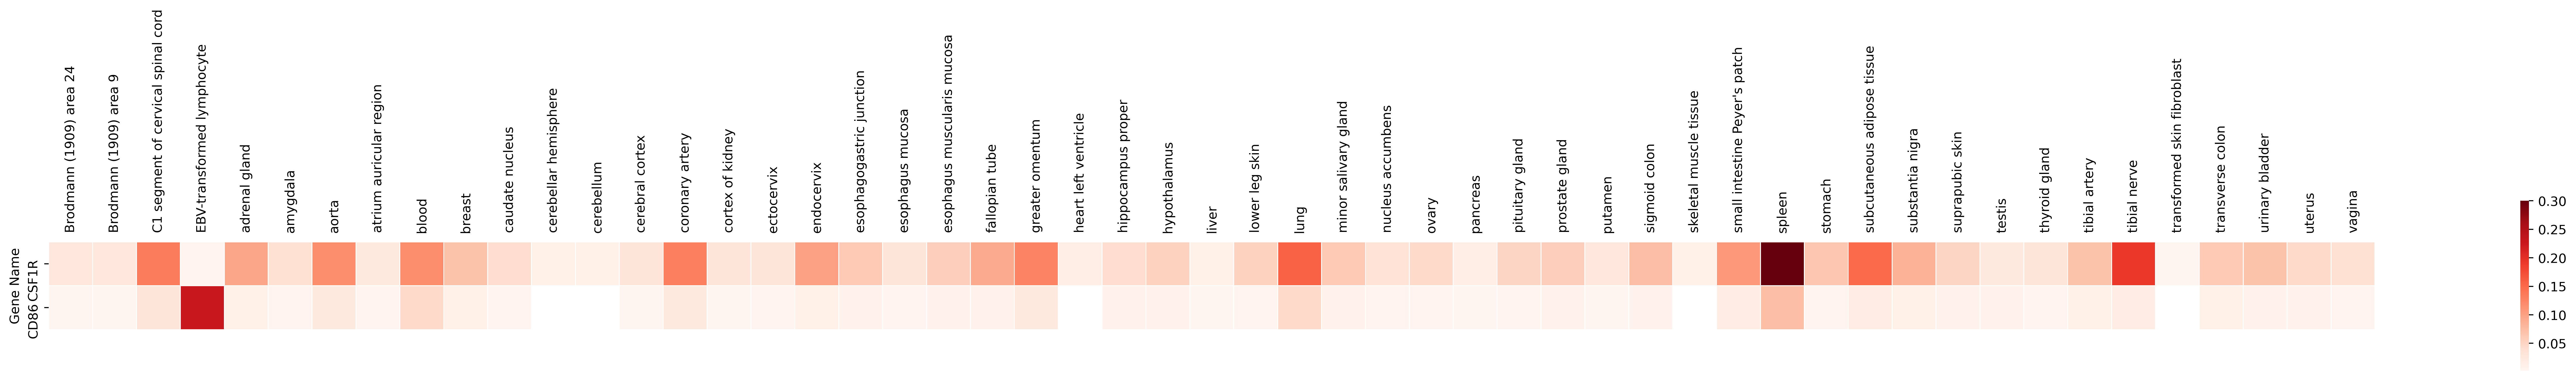

In [85]:
ax = sb.heatmap(normalized_df_tpm, linewidth=0.5, vmax=.3, cmap='Reds',square=True, cbar_kws={"shrink": 1.2})
plt.tick_params(axis='both', which='major', rotation=90,
                labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.invert_yaxis()
plt.show()

## Merge categories in human TPM

In [86]:
df_tpm_combined=df_tpm.copy()
df_tpm_combined

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0


In [87]:
# brain
brain = df_tpm[['Brodmann (1909) area 24', 'Brodmann (1909) area 9', 'amygdala','caudate nucleus', 'cerebellar hemisphere', 
                'cerebellum', 'cerebral cortex','hippocampus proper','hypothalamus','nucleus accumbens','pituitary gland',
                'putamen','substantia nigra']]
brain

,Brodmann (1909) area 24,Brodmann (1909) area 9,amygdala,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,hippocampus proper,hypothalamus,nucleus accumbens,pituitary gland,putamen,substantia nigra
Gene Name,,,,,,,,,,,,,
CD86,0.7,0.8,1.0,1.0,NaN,NaN,0.5,2.0,2.0,1.0,1.0,0.8,3.0
CSF1R,7.0,7.0,10.0,11.0,3.0,3.0,8.0,11.0,14.0,9.0,13.0,7.0,22.0


In [88]:
# calculate mean for both genes
df_tpm_combined['brain_avg'] = brain.mean(axis=1)
df_tpm_combined

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,brain_avg
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0,1.254545
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0,9.615385


In [89]:
# colon
colon = df_tpm[['sigmoid colon', "small intestine Peyer's patch", 'transverse colon']]
colon

,sigmoid colon,small intestine Peyer's patch,transverse colon
Gene Name,,,
CD86,2.0,5.0,3.0
CSF1R,19.0,28.0,16.0


In [90]:
# calculate mean for both genes
df_tpm_combined['colon_avg'] = colon.mean(axis=1)
df_tpm_combined

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,brain_avg,colon_avg
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0,1.254545,3.333333
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0,9.615385,21.000000


In [91]:
# heart
heart = df_tpm[['atrium auricular region', "heart left ventricle"]]
heart

,atrium auricular region,heart left ventricle
Gene Name,,
CD86,1.0,NaN
CSF1R,6.0,4.0


In [92]:
# calculate mean for both genes
df_tpm_combined['heart_avg'] = heart.mean(axis=1)
df_tpm_combined

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,brain_avg,colon_avg,heart_avg
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0,1.254545,3.333333,1.0
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0,9.615385,21.000000,5.0


In [93]:
# kidney
kidney = df_tpm[['adrenal gland', 'cortex of kidney']]
kidney

,adrenal gland,cortex of kidney
Gene Name,,
CD86,3.0,0.8
CSF1R,25.0,8.0


In [94]:
# calculate mean for both genes
df_tpm_combined['kidney_avg'] = kidney.mean(axis=1)
df_tpm_combined

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,brain_avg,colon_avg,heart_avg,kidney_avg
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0,1.254545,3.333333,1.0,1.9
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0,9.615385,21.000000,5.0,16.5


In [95]:
# vagina
vagina = df_tpm[['ectocervix','endocervix','fallopian tube','ovary','uterus','vagina']]
vagina

,ectocervix,endocervix,fallopian tube,ovary,uterus,vagina
Gene Name,,,,,,
CD86,1.0,3.0,2.0,1.0,2.0,1.0
CSF1R,8.0,26.0,24.0,12.0,12.0,10.0


In [96]:
# calculate mean for both genes
df_tpm_combined['vagina_avg'] = vagina.mean(axis=1)
df_tpm_combined

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,brain_avg,colon_avg,heart_avg,kidney_avg,vagina_avg
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0,1.254545,3.333333,1.0,1.9,1.666667
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0,9.615385,21.000000,5.0,16.5,15.333333


In [97]:
# esophagus
esophagus = df_tpm[["esophagogastric junction","esophagus mucosa","esophagus muscularis mucosa"]]
esophagus

,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa
Gene Name,,,
CD86,2.0,1.0,2.0
CSF1R,16.0,8.0,15.0


In [98]:
# calculate mean for both genes
df_tpm_combined['esophagus_avg'] = esophagus.mean(axis=1)
df_tpm_combined

,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,blood,breast,caudate nucleus,cerebellar hemisphere,cerebellum,cerebral cortex,coronary artery,cortex of kidney,ectocervix,endocervix,esophagogastric junction,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,greater omentum,heart left ventricle,hippocampus proper,hypothalamus,liver,lower leg skin,lung,minor salivary gland,nucleus accumbens,ovary,pancreas,pituitary gland,prostate gland,putamen,sigmoid colon,skeletal muscle tissue,small intestine Peyer's patch,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,brain_avg,colon_avg,heart_avg,kidney_avg,vagina_avg,esophagus_avg
Gene Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CD86,0.7,0.8,8.0,59.0,3.0,1.0,6.0,1.0,12.0,3.0,1.0,NaN,NaN,0.5,6.0,0.8,1.0,3.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,0.7,1.0,12.0,2.0,1.0,1.0,0.5,1.0,2.0,0.8,2.0,NaN,5.0,19.0,1.0,5.0,3.0,2.0,2.0,1.0,3.0,5.0,NaN,3.0,2.0,2.0,1.0,1.254545,3.333333,1.0,1.9,1.666667,1.666667
CSF1R,7.0,7.0,35.0,0.9,25.0,10.0,31.0,6.0,31.0,18.0,11.0,3.0,3.0,8.0,34.0,8.0,8.0,26.0,16.0,8.0,15.0,24.0,33.0,4.0,11.0,14.0,3.0,14.0,41.0,16.0,9.0,12.0,4.0,13.0,15.0,7.0,19.0,3.0,28.0,260.0,17.0,39.0,22.0,13.0,6.0,8.0,18.0,50.0,0.5,16.0,18.0,12.0,10.0,9.615385,21.000000,5.0,16.5,15.333333,13.000000


In [99]:
# select relevant categories to plot

In [100]:
df_tpm_combined_plot = df_tpm_combined[['C1 segment of cervical spinal cord','blood', 'breast', 'liver', 'lung','pancreas',
                                        'skeletal muscle tissue','spleen','testis', 'brain_avg', 
                                        'colon_avg','heart_avg', 'kidney_avg', 'vagina_avg', 'esophagus_avg']]

In [101]:
df_tpm_combined_plot

,C1 segment of cervical spinal cord,blood,breast,liver,lung,pancreas,skeletal muscle tissue,spleen,testis,brain_avg,colon_avg,heart_avg,kidney_avg,vagina_avg,esophagus_avg
Gene Name,,,,,,,,,,,,,,,
CD86,8.0,12.0,3.0,0.7,12.0,0.5,NaN,19.0,2.0,1.254545,3.333333,1.0,1.9,1.666667,1.666667
CSF1R,35.0,31.0,18.0,3.0,41.0,4.0,3.0,260.0,6.0,9.615385,21.000000,5.0,16.5,15.333333,13.000000


In [102]:
df_tpm_combined_plot.columns

Index(['C1 segment of cervical spinal cord', 'blood', 'breast', 'liver',
       'lung', 'pancreas', 'skeletal muscle tissue', 'spleen', 'testis',
       'brain_avg', 'colon_avg', 'heart_avg', 'kidney_avg', 'vagina_avg',
       'esophagus_avg'],
      dtype='object')

In [103]:
df_tpm_combined_plot.columns=['Spinal chord', 'Blood', 'Breast', 'Liver','Lung', 'Pancreas', 'Skeletal muscle tissue', 
                              'Spleen', 'Testis','Brain', 'Colon', 'Heart', 'Kidney','Vagina', 'Esophagus']

In [104]:
# correct order
order=['Brain','Lung', 'Liver','Kidney','Colon', 'Heart', 'Skeletal muscle tissue',  'Spleen', 'Testis',
       'Vagina','Pancreas',  'Esophagus','Blood', 'Breast', 'Spinal chord']

In [105]:
df_tpm_combined_plot=df_tpm_combined_plot.reindex(columns=order)
df_tpm_combined_plot

,Brain,Lung,Liver,Kidney,Colon,Heart,Skeletal muscle tissue,Spleen,Testis,Vagina,Pancreas,Esophagus,Blood,Breast,Spinal chord
Gene Name,,,,,,,,,,,,,,,
CD86,1.254545,12.0,0.7,1.9,3.333333,1.0,NaN,19.0,2.0,1.666667,0.5,1.666667,12.0,3.0,8.0
CSF1R,9.615385,41.0,3.0,16.5,21.000000,5.0,3.0,260.0,6.0,15.333333,4.0,13.000000,31.0,18.0,35.0


In [106]:
# normalize
column_maxes = df_tpm_combined_plot.max()
df_max = column_maxes.max()
normalized_df_tpm_combined_plot = df_tpm_combined_plot / df_max

In [107]:
normalized_df_tpm_combined_plot

,Brain,Lung,Liver,Kidney,Colon,Heart,Skeletal muscle tissue,Spleen,Testis,Vagina,Pancreas,Esophagus,Blood,Breast,Spinal chord
Gene Name,,,,,,,,,,,,,,,
CD86,0.004825,0.046154,0.002692,0.007308,0.012821,0.003846,NaN,0.073077,0.007692,0.006410,0.001923,0.00641,0.046154,0.011538,0.030769
CSF1R,0.036982,0.157692,0.011538,0.063462,0.080769,0.019231,0.011538,1.000000,0.023077,0.058974,0.015385,0.05000,0.119231,0.069231,0.134615


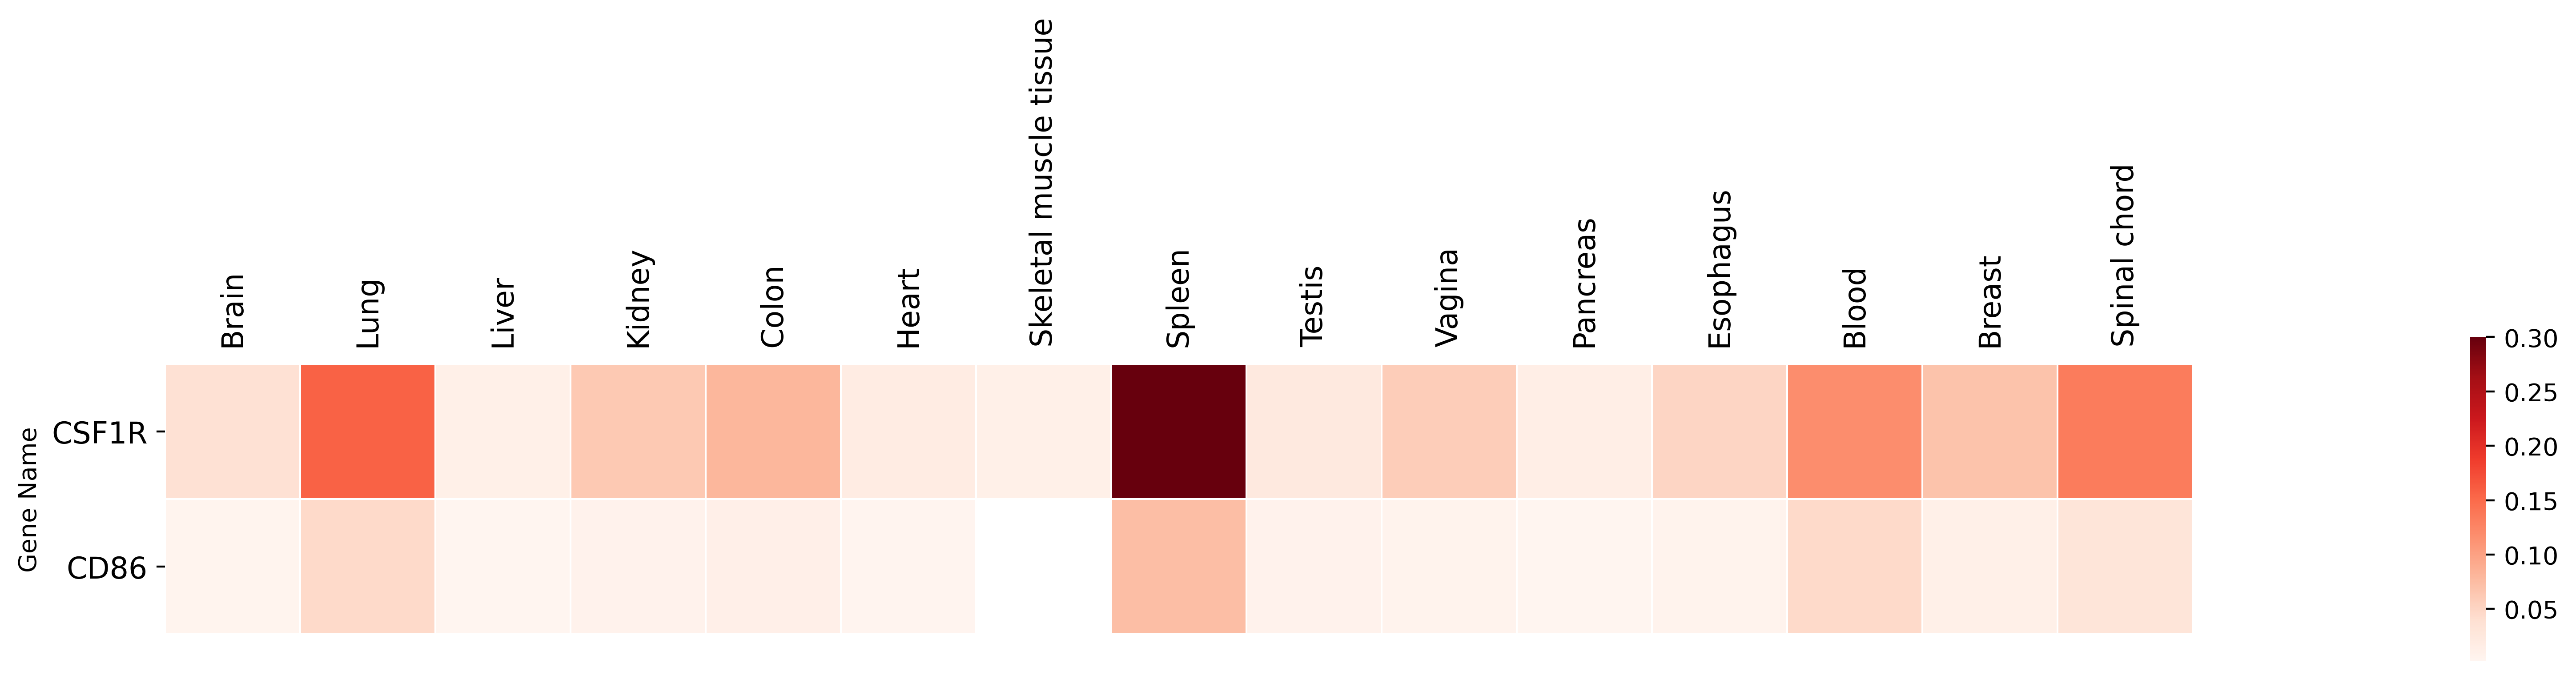

In [108]:
ax = sb.heatmap(normalized_df_tpm_combined_plot, linewidth=0.5, vmax=.3, cmap='Reds',square=True, cbar_kws={"shrink": 1.2})
plt.tick_params(axis='both', which='major', rotation=90,
                labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.invert_yaxis()
plt.yticks(rotation=0)
plt.show()

## Mouse Merkin

In [114]:
# Merkin TPM data for CD86 and CSF1R was obtained using the Expression Atlas (https://www.ebi.ac.uk/gxa/home)

In [115]:
df_tpm=pd.read_csv(writepath + 'mouse_merkin_TPM.csv', delimiter=';')
df_tpm.index=df_tpm['Gene Name']
df_tpm = df_tpm.iloc[: , 2:]
df_tpm

,brain,colon,heart,kidney,liver,lung,skeletal muscle tissue,spleen,testis
Gene Name,,,,,,,,,
Cd86,2.0,3.0,8.0,0.9,1.0,4.0,0.6,77.0,0.8
Csf1r,62.0,25.0,71.0,64.0,25.0,122.0,8.0,447.0,3.0


In [116]:
# normalize
column_maxes = df_tpm.max()
df_max = column_maxes.max()
normalized_df_tpm = df_tpm / df_max

In [117]:
normalized_df_tpm

,brain,colon,heart,kidney,liver,lung,skeletal muscle tissue,spleen,testis
Gene Name,,,,,,,,,
Cd86,0.004474,0.006711,0.017897,0.002013,0.002237,0.008949,0.001342,0.17226,0.001790
Csf1r,0.138702,0.055928,0.158837,0.143177,0.055928,0.272931,0.017897,1.00000,0.006711


In [118]:
vardf=pd.DataFrame({'gene_symbol': df_tpm.index},index=df_tpm.index.astype(str))

In [119]:
obsdf=pd.DataFrame({'tissue': df_tpm.columns.astype('category')})

In [120]:
adata_tpm=anndata.AnnData(X=df_tpm.values.transpose(), obs=obsdf, var=vardf)
adata_tpm_norm=anndata.AnnData(X=normalized_df_tpm.values.transpose(), obs=obsdf, var=vardf)

Transforming to str index.
Transforming to str index.


In [121]:
adata_tpm.strings_to_categoricals()
adata_tpm_norm.strings_to_categoricals()

/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [122]:
sc.set_figure_params(vector_friendly=True, color_map='Reds',
                     dpi=200,transparent=True, fontsize=10)

In [123]:
plt.rcParams["figure.figsize"] = (20,1)

In [124]:
normalized_df_tpm.columns=['Brain', 'Colon', 'Heart', 'Kidney', 'Liver', 'Lung',
       'Skeletal muscle tissue', 'Spleen', 'Testis']

In [125]:
normalized_df_tpm=normalized_df_tpm.reindex(columns=order[:9])
normalized_df_tpm

,Brain,Lung,Liver,Kidney,Colon,Heart,Skeletal muscle tissue,Spleen,Testis
Gene Name,,,,,,,,,
Cd86,0.004474,0.008949,0.002237,0.002013,0.006711,0.017897,0.001342,0.17226,0.001790
Csf1r,0.138702,0.272931,0.055928,0.143177,0.055928,0.158837,0.017897,1.00000,0.006711


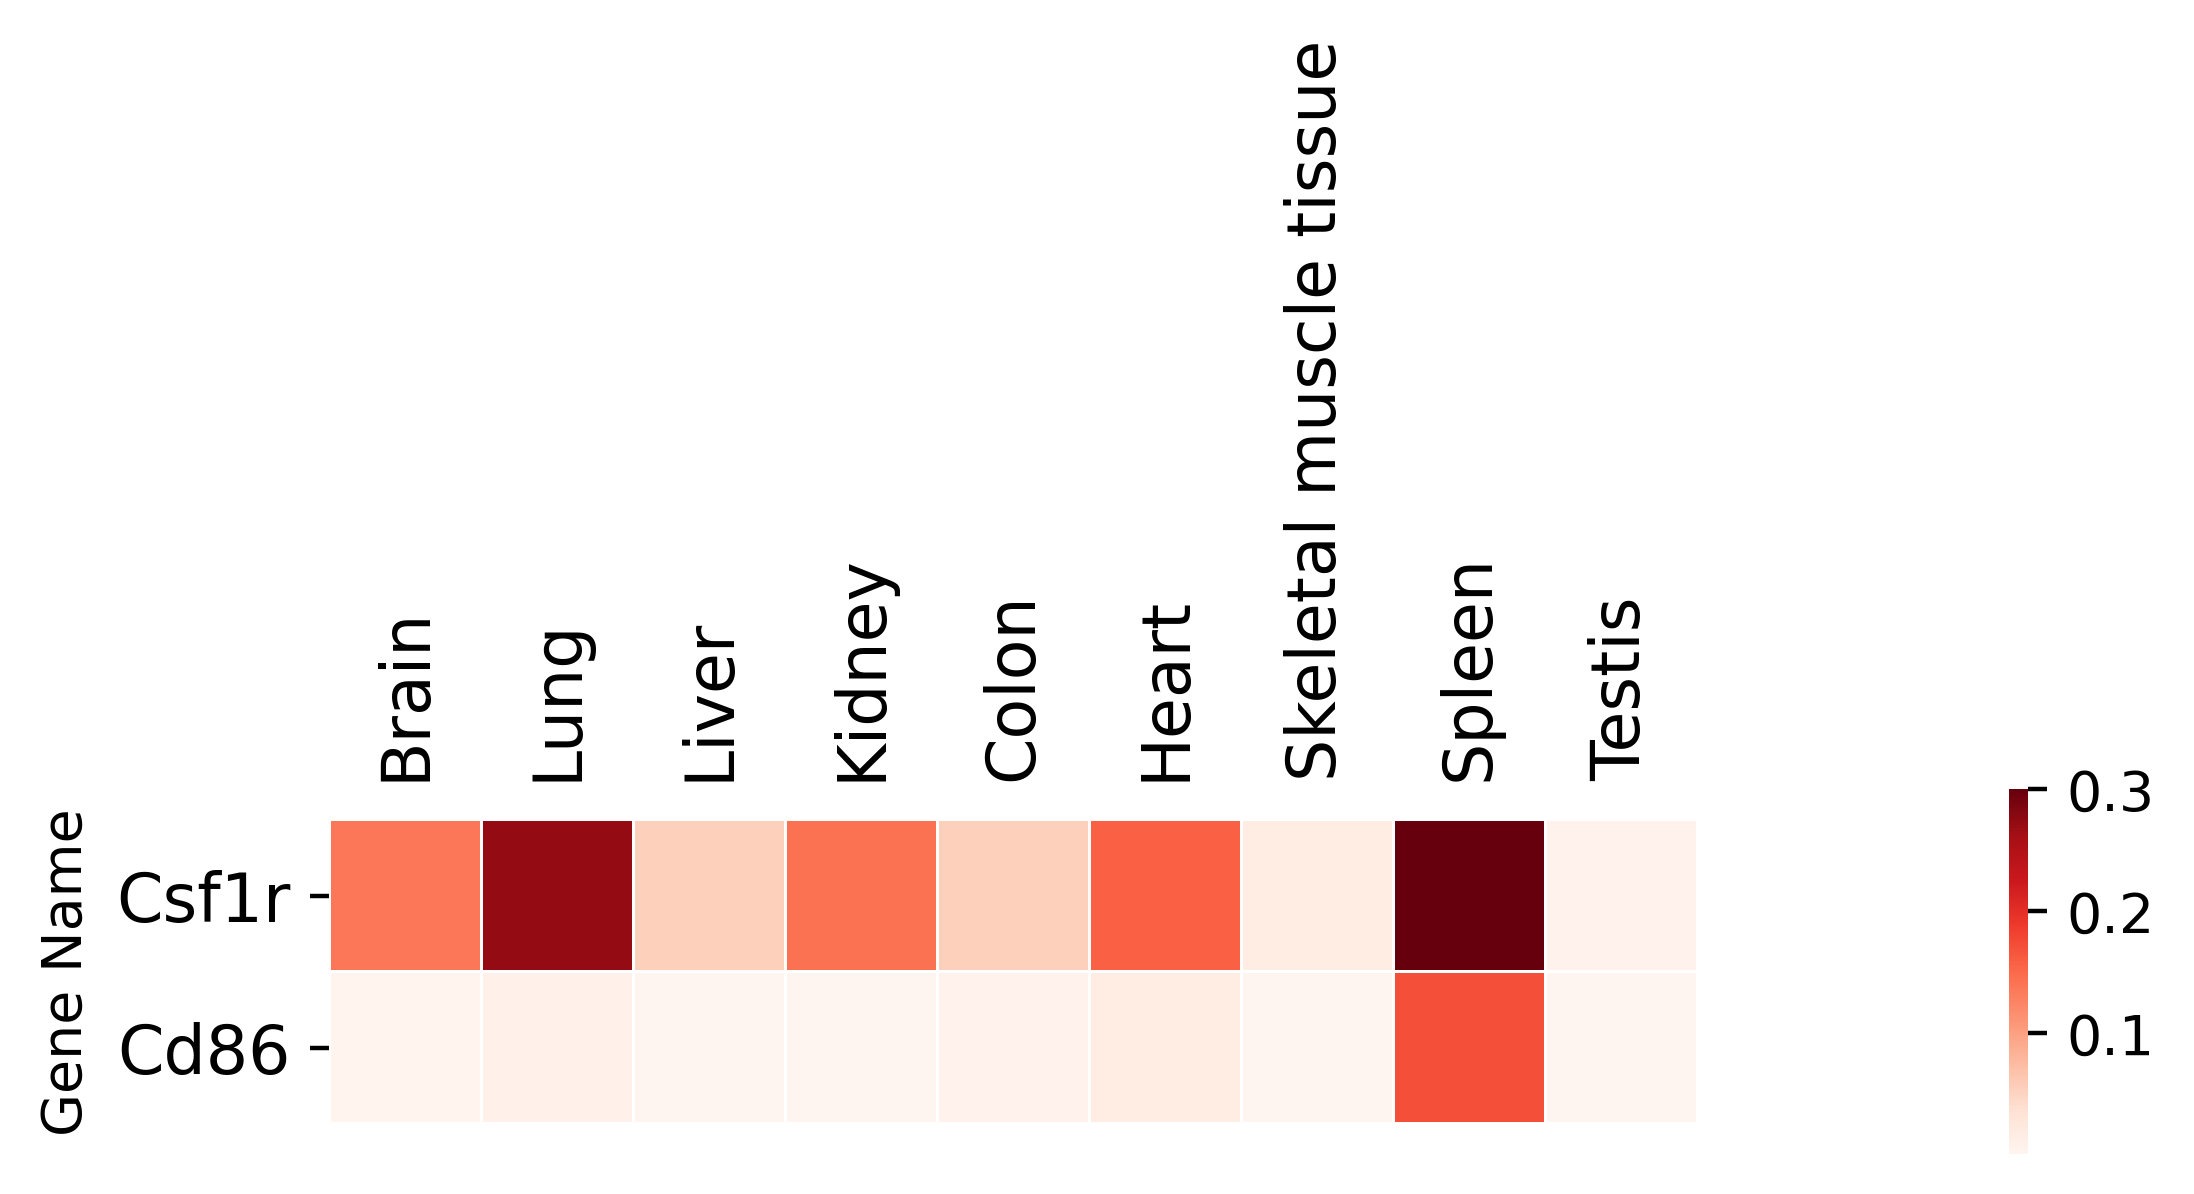

In [126]:
ax = sb.heatmap(normalized_df_tpm, linewidth=0.5, vmax=.3, cmap='Reds',square=True, cbar_kws={"shrink": 1.2})
plt.tick_params(axis='both', which='major', rotation=90,
                labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.invert_yaxis()
plt.yticks(rotation=0)
plt.show()